In [460]:
from pathlib import Path
import importlib
import warnings
import time
import os
warnings.filterwarnings("ignore")  # Oculta todos los warnings

# Mis modulos
import file_management as fm
import file_processing as fp
import graphics_settings as gs
import generate_html as gh
import send_email as sm

In [461]:
# import pyfiglet
# print(pyfiglet.figlet_format("Contratos Email"))

banner = r"""
  ____            _             _              _____                 _ _ 
 / ___|___  _ __ | |_ _ __ __ _| |_ ___  ___  | ____|_ __ ___   __ _(_) |
| |   / _ \| '_ \| __| '__/ _` | __/ _ \/ __| |  _| | '_ ` _ \ / _` | | |
| |__| (_) | | | | |_| | | (_| | || (_) \__ \ | |___| | | | | | (_| | | |
 \____\___/|_| |_|\__|_|  \__,_|\__\___/|___/ |_____|_| |_| |_|\__,_|_|_|

               💥 AUTOMATIZADOR DETECTOR DE CONTRATOS 💥
"""

print(banner, end='\n\n')
time.sleep(1)


  ____            _             _              _____                 _ _ 
 / ___|___  _ __ | |_ _ __ __ _| |_ ___  ___  | ____|_ __ ___   __ _(_) |
| |   / _ \| '_ \| __| '__/ _` | __/ _ \/ __| |  _| | '_ ` _ \ / _` | | |
| |__| (_) | | | | |_| | | (_| | || (_) \__ \ | |___| | | | | | (_| | | |
 \____\___/|_| |_|\__|_|  \__,_|\__\___/|___/ |_____|_| |_| |_|\__,_|_|_|

               💥 AUTOMATIZADOR DETECTOR DE CONTRATOS 💥




In [449]:
months = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 
    11: 'Noviembre', 12: 'Diciembre'
}
contratos = {
    "name": "Control contratos",
    "file_name": "Control Contratos.xlsx",
    "sheet_name": "DATOS",
    "relevant_columns": [
        'TRABAJADOR',
        'NRODOCIDEN',
        'FECINGRESO_A',
        'TIPO_CONTRATO',
        'FECHAFINCONTRATO',
    ],
    "reports": [
        "PERSONA"
    ]
}

# Listas

# Constantes
project_address = r"C:\Informacion\Otros\RRHH\Automatizacion\contract_alert"
determined_graphic = 'determined_graphic.png'
indetermined_graphic = 'indetermined_graphic.png'
determined_name = 'determined'
indetermined_name = 'indetermined'

In [450]:
importlib.reload(fm)

df = fm.main(os.path.join(project_address, contratos['file_name']), contratos)

In [451]:
importlib.reload(fp)

df = fp.main(df)

### Reportes

'POR NECESEIDADES DEL MERCADO' y 'A PLAZO INDETERMINADO'

In [452]:
df_determined = df[df['TIPO_CONTRATO'] == 'POR NECESIDADES DEL MERCADO']
df_indetermined = df[df['TIPO_CONTRATO'] == 'A PLAZO INDETERMINADO']

### Contrato determinado

In [453]:
importlib.reload(fp)
importlib.reload(gs)

df_determined, less_than_10_days = fp.calculate_left_days(df_determined)
#gs.main(project_address, determined_graphic, df_determined, contratos)

### Contrato indeterminado

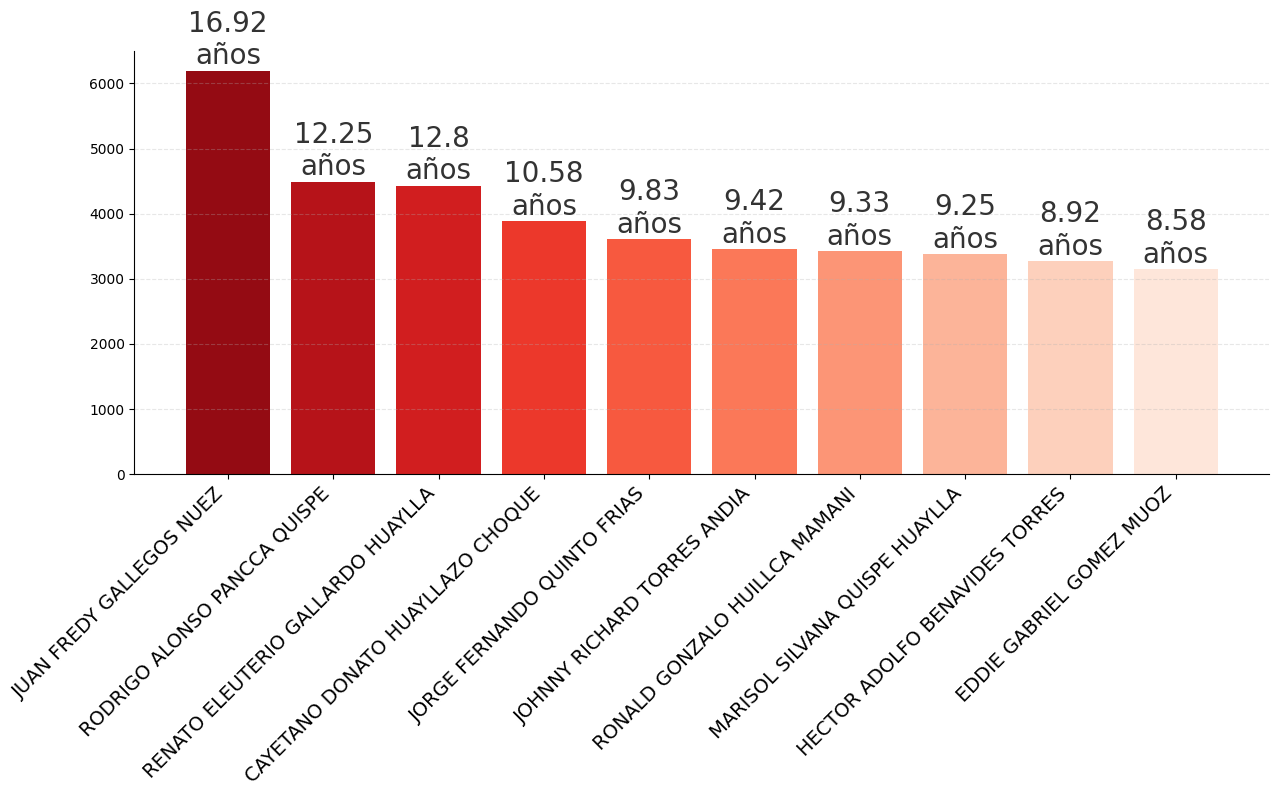

In [454]:
importlib.reload(fp)
importlib.reload(gs)

df_indetermined = fp.calculate_days_worked(df_indetermined)
gs.main(project_address, indetermined_graphic, df_indetermined, contratos)

df_indetermined, less_than_a_week = fp.calculated_three_years_workers(df_indetermined)

### Generacion y envio de reporte

In [455]:
MAIL_TO = "rrhh@ayacda.com; gportocarrerob@unsa.edu.pe;"
#MAIL_TO = "gportocarrerob@unsa.edu.pe; ainformacion@ayacda.com"
MAIL_CC = ";"

In [ ]:
importlib.reload(gh)
importlib.reload(sm)

if less_than_10_days:
    html = gh.generate_determined_html(df_determined, os.path.join(project_address, indetermined_graphic))
    with open(os.path.join(project_address, f'{determined_name}.html'), 'w', encoding='utf-8') as f:
        f.write(html)

    sm.main(project_address, MAIL_TO, MAIL_CC, determined_name, f'ALERTA: Detección de contrato cerca a finalizar')
else:
    # Mensaje No Exitoso
    print(f'\n[*] Estado: No se detecto la alerta {determined_name}')
    print(f'[X] No corresponde envio de correo')
    
if less_than_a_week:
    html = gh.generate_indetermined_html(df_determined, df_indetermined, os.path.join(project_address, indetermined_graphic))
    with open(os.path.join(project_address, f'{indetermined_name}.html'), 'w', encoding='utf-8') as f:
        f.write(html)
        
    sm.main(project_address, MAIL_TO, MAIL_CC, indetermined_name, f'ALERTA: Personas a punto de cumplir 3 años')
else:
    # Mensaje No Exitoso
    print(f'\n[*] Estado: No se detecto la alerta {indetermined_name}')
    print(f'[X] No corresponde envio de correo')

### Limpiar carpeta

In [ ]:
carpeta = Path(project_address)
#print(list(carpeta.glob('*.png')))

# Eliminar archivos .png
for imagen in carpeta.glob('*.png'):
    imagen.unlink()  # .unlink() elimina el archivo

# Eliminar archivos .html
for imagen in carpeta.glob('*.html'):
    imagen.unlink()  # .unlink() elimina el archivo

### Export it as .py

In [465]:
import nbformat
from nbconvert import PythonExporter

# Cargar el notebook
notebook_path = "main.ipynb"
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Eliminar la última celda
nb['cells'] = nb['cells'][:-1]

# Convertir a script .py
exporter = PythonExporter()
codigo_python, _ = exporter.from_notebook_node(nb)

# Guardar el archivo .py
with open("main.py", "w", encoding="utf-8") as f:
    f.write(codigo_python)

print("✅ Archivo .py creado sin la última celda.")

✅ Archivo .py creado sin la última celda.
